In [14]:
# Importe das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import datetime
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [15]:
# Importar a base de dados
df = pd.read_csv('preco.csv', header =0, sep = ',', decimal = ',')

In [17]:
# Colocando loan como um número inteiro
df['preco'] = df['preco'].astype(np.int32)
# Colocando a coluna data com formato de data
df['data'] = pd.to_datetime(df['data'])

In [18]:
df_treino = df[0:94]
df_teste = df[95:104]

In [ ]:
# Análise descritiva

df.head()
df.describe()
df.info()

In [ ]:

# plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.preco)
plt.xlabel('data', fontsize = 15)
plt.ylabel('preco',fontsize = 15)
plt.grid()

In [25]:
# Verificando a Estacionariedade

test_estacionariedade = adfuller(df['preco'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                           -1.714718
p-valor                          0.423546
Lags                             1.000000
Número de observações usadas    85.000000
Valor crítico(1%)               -3.509736
Valor crítico(5%)               -2.896195
Valor crítico(10%)              -2.585258
dtype: float64


In [ ]:
# Verificando as funções ACF e PACF
acf = plot_acf(df['preco'], lags = 20)
pacf = plot_pacf(df['preco'], lags = 20)

In [ ]:
# Diferenciações
primeira_dif = df['preco'].diff()

primeira_dif.plot()

In [ ]:
# Verificando a estacionariedade da série diferenciada
test_estacionariedade_dif1 = adfuller(primeira_dif.dropna())
output_dif = pd.Series(test_estacionariedade_dif1[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade_dif1[4].items():
  output['Valor crítico(%s)' %key] = value
print(output_dif)

In [ ]:
# Diferenciações
segunda_dif = primeira_dif.diff()

segunda_dif.plot()

In [ ]:
# Verificando a estacionariedade da série diferenciada
test_estacionariedade_dif1 = adfuller(segunda_dif.dropna())
output_dif = pd.Series(test_estacionariedade_dif1[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade_dif1[4].items():
  output['Valor crítico(%s)' %key] = value
print(output_dif)

In [38]:
# Modelo Arima
model = ARIMA(df['preco'], order=(1,2,1))

model_fit = model.fit()

In [39]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.preco   No. Observations:                   85
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -245.209
Method:                       css-mle   S.D. of innovations              4.241
Date:                Mon, 01 Feb 2021   AIC                            498.418
Time:                        00:13:37   BIC                            508.188
Sample:                             2   HQIC                           502.348
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0070      0.031     -0.222      0.825      -0.068       0.054
ar.L1.D2.preco     0.4164      0.112      3.723      0.000       0.197       0.636
ma.L1.D2.preco    -1.0000      0.050

Plotting AR model


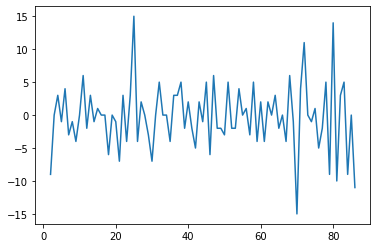

In [40]:

plt.plot(segunda_dif)


print('Plotting AR model')

In [41]:
# Teste para verificar o modelo

acorr_ljungbox(model_fit.resid, lags=[10], boxpierce= False)

(array([5.29566206]), array([0.87057282]))